## Tables and Figures Rey (2016)

**Rey, S.J. (2016) “Space-time patterns of rank concordance: Local indicators of mobility association with applications to spatial income inequality dynamics.” *Annals of the Association of American Geographers.* DOI [10.1080/24694452.2016.1151336](http://dx.doi.org/10.1080/24694452.2016.1151336)**

This notebook reproduces the following

* Figure 3

Note that the values and figures produced here were then incorporated into the main LaTeX file for submission. In some cases the column/row labels were editted prior to production. All numerical results, however, were as produced by this script.



In [1]:
%pylab inline
import numpy as np
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 8.5

top01 = np.loadtxt('top01.dat')
top10 = np.loadtxt('top10.dat')
abbreviations = np.loadtxt('ab48.dat', dtype='str').tolist()
dbf = ps.open(ps.examples.get_path("us48.dbf"))
psab = np.array(dbf.by_col('STATE_ABBR')).tolist()
order = np.array([abbreviations.index(ab) for ab in psab])
top01 = top01[order]
top10 = top10[order]

In [3]:
shp_path = "mexicojoin.shp"
dbf_path = "mexicojoin.dbf"

In [4]:
dbf = ps.open(dbf_path)
dbf.header
var_names = ["PCGDP%d"%year for year in range(1940,2010, 10) ]
print dbf.header
pcgdp = np.array([dbf.by_col(v) for v in var_names]).T

rpcgdp = pcgdp/pcgdp.mean(axis=0)

[u'POLY_ID', u'AREA', u'CODE', u'NAME', u'PERIMETER', u'ACRES', u'HECTARES', u'PCGDP1940', u'PCGDP1950', u'PCGDP1960', u'PCGDP1970', u'PCGDP1980', u'PCGDP1990', u'PCGDP2000', u'HANSON03', u'HANSON98', u'ESQUIVEL99', u'INEGI', u'INEGI2', u'MAXP', u'GR4000', u'GR5000', u'GR6000', u'GR7000', u'GR8000', u'GR9000', u'LPCGDP40', u'LPCGDP50', u'LPCGDP60', u'LPCGDP70', u'LPCGDP80', u'LPCGDP90', u'LPCGDP00', u'TEST']


In [5]:
rpcgdp[:,0]

array([ 3.09258051,  1.32396911,  0.66883052,  0.73424757,  1.43613237,
        0.60286027,  1.5235395 ,  0.6104669 ,  0.46013217,  0.47133466,
        2.46399599,  0.95553145,  0.95926561,  1.10503637,  0.51974051,
        0.49360135,  3.03781275,  0.49858024,  0.30163759,  0.26166819,
        0.34008566,  0.40577931,  0.88499721,  1.18635819,  1.1806878 ,
        0.66938373,  1.67788501,  0.51642125,  0.6046582 ,  1.25481789,
        1.0383746 ,  0.71958751])

In [6]:
rpcgdp.mean(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [7]:
bins_5 = np.array([ps.Quantiles(g, k=5).yb for g in pcgdp.T])

r_5 = [ps.Quantiles(g, k=5) for g in rpcgdp.T]

In [8]:
bins_5

array([[4, 4, 2, 2, 4, 1, 4, 1, 0, 0, 4, 2, 3, 3, 1, 0, 4, 1, 0, 0, 0, 0,
        2, 3, 3, 2, 4, 1, 1, 3, 3, 2],
       [4, 4, 2, 2, 1, 1, 1, 1, 1, 0, 4, 1, 3, 3, 0, 2, 4, 0, 0, 0, 0, 0,
        4, 4, 3, 2, 3, 2, 2, 4, 3, 3],
       [4, 4, 2, 3, 2, 2, 1, 1, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 0, 0, 1, 0,
        4, 4, 4, 3, 2, 0, 1, 4, 2, 3],
       [4, 4, 1, 3, 3, 1, 2, 0, 0, 3, 4, 2, 2, 2, 1, 1, 3, 0, 0, 0, 1, 0,
        4, 4, 4, 3, 2, 0, 1, 4, 3, 2],
       [4, 4, 1, 3, 3, 1, 2, 0, 0, 3, 4, 2, 2, 1, 0, 1, 4, 0, 0, 0, 4, 2,
        3, 3, 4, 2, 2, 0, 1, 4, 3, 1],
       [4, 4, 1, 3, 3, 1, 3, 1, 0, 2, 4, 2, 2, 1, 4, 0, 3, 0, 0, 0, 2, 0,
        3, 4, 4, 2, 2, 0, 1, 4, 3, 1],
       [4, 3, 0, 3, 3, 1, 3, 1, 0, 2, 4, 2, 2, 2, 4, 1, 4, 0, 0, 0, 1, 0,
        3, 4, 4, 1, 2, 0, 2, 4, 3, 1]])

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


In [10]:

reader = shpreader.Reader(ps.examples.get_path("us48.shp"))
reader = shpreader.Reader(shp_path)

ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
plt.title("Year Here")
for state in reader.geometries():
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(), 
                     facecolor=facecolor, edgecolor=edgecolor)
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


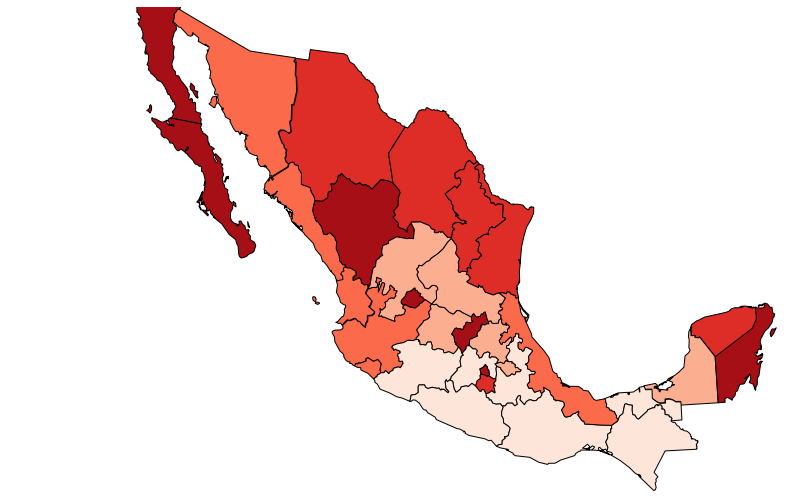

In [11]:

def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()
   
    
facecolors = ['blue','green','yellow','orange','red']
facecolors = [ '#f7f7f7', '#cccccc', '#969696', '#636363', '#252525']
facecolors = [ '#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']


classes = np.random.random_integers(0,4,48)
legend=[ "Q%d"%i for i in range(1,6)]
#legend =[ "%3.2f"%ub for ub in bins_5 ]
legend =[ "%d"%ub for ub in bins_5[0] ]
classes = bins_5[0]

choropleth(classes,facecolors,reader)

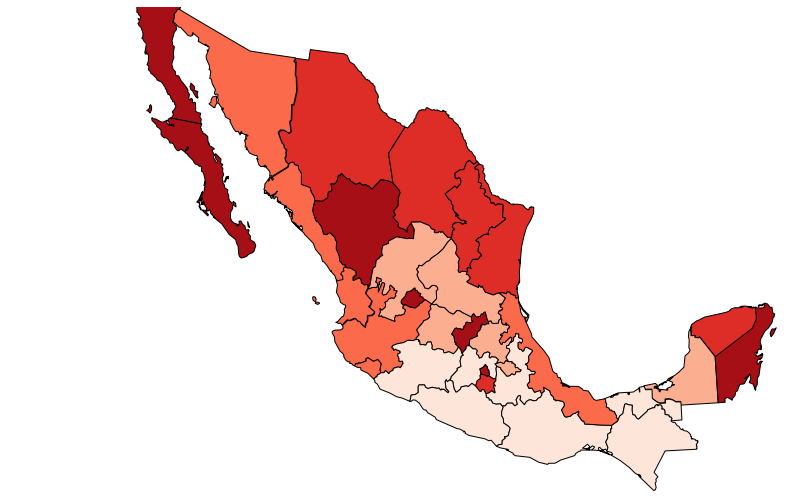

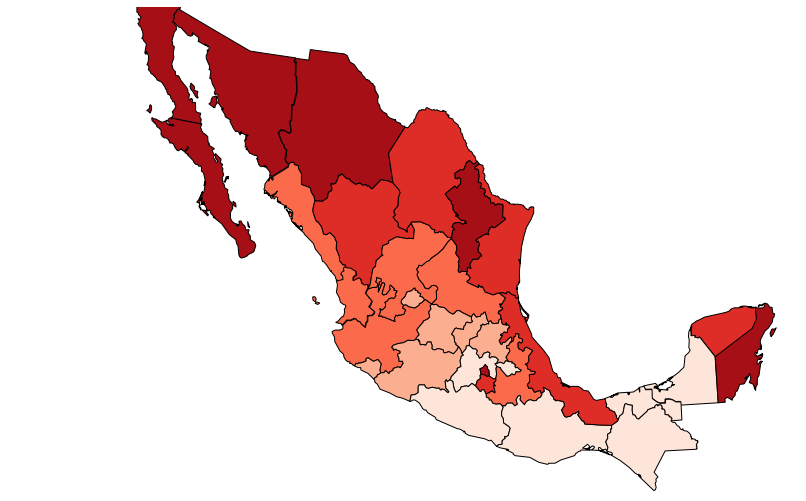

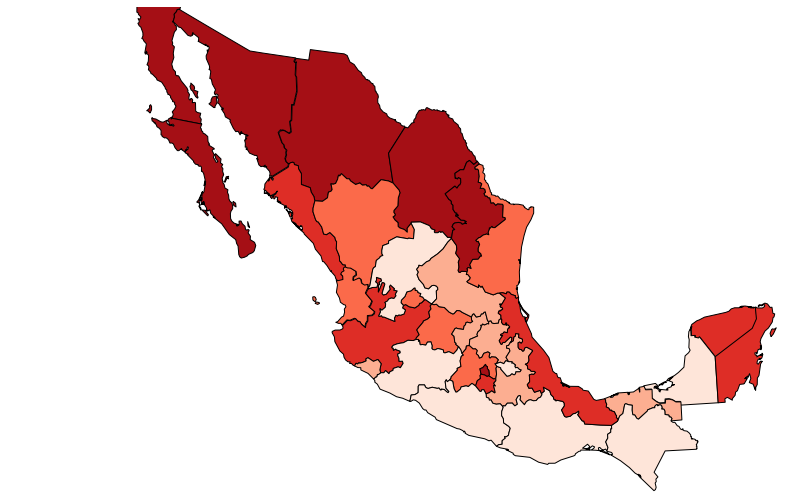

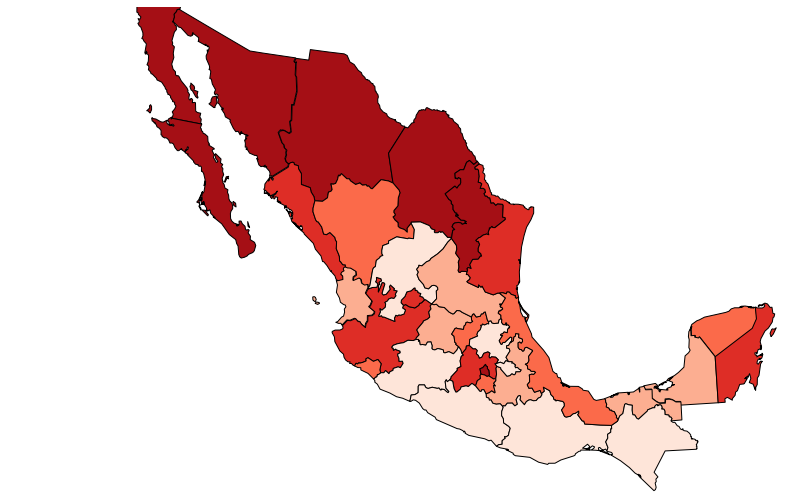

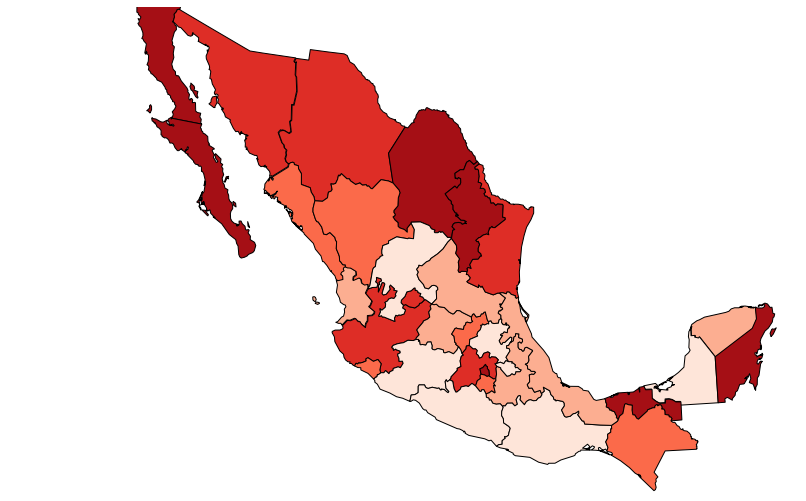

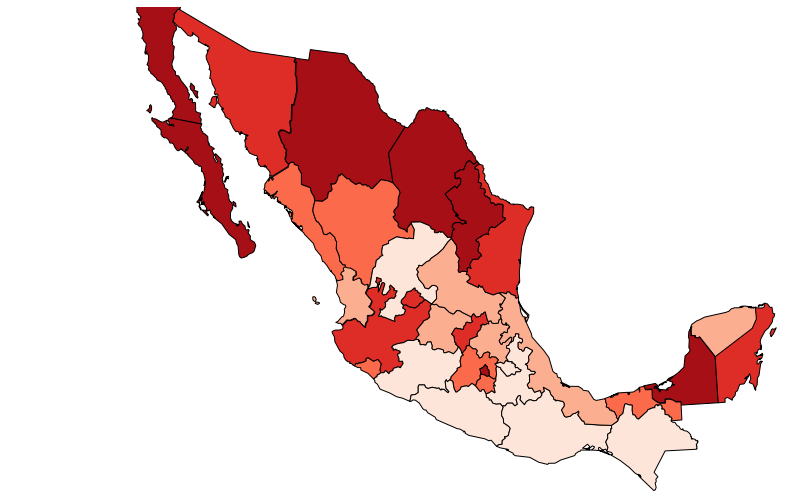

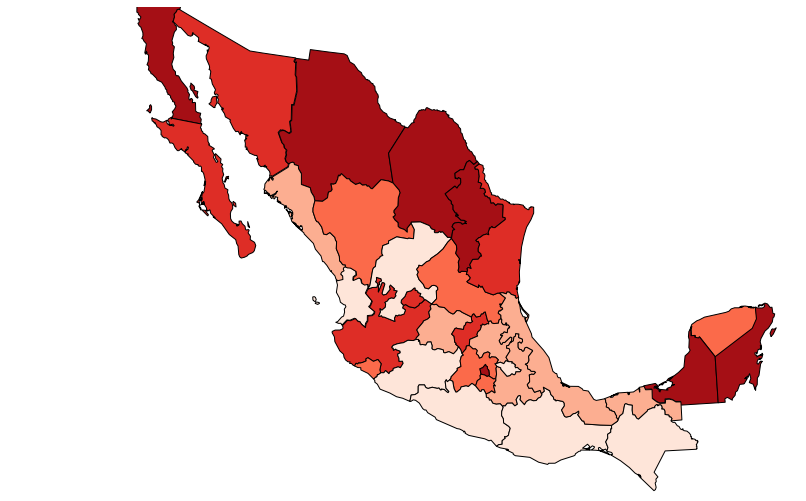

In [12]:
for classes in bins_5:
    choropleth(classes,facecolors,reader)

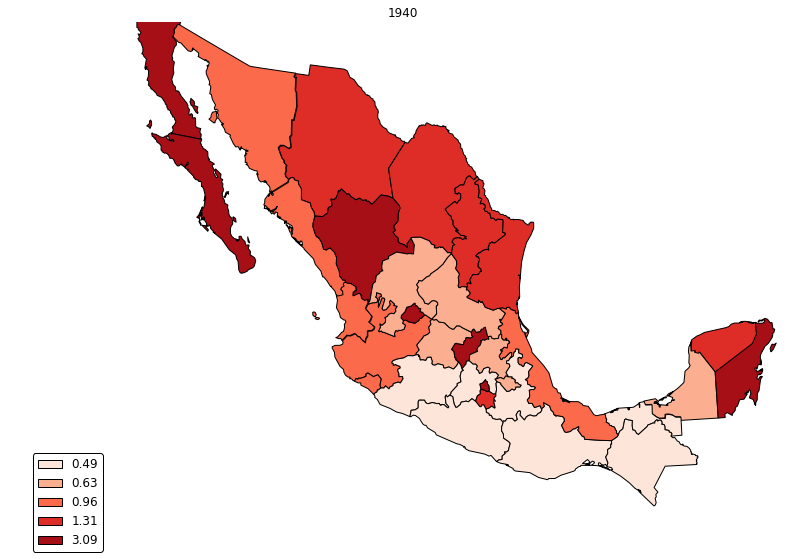

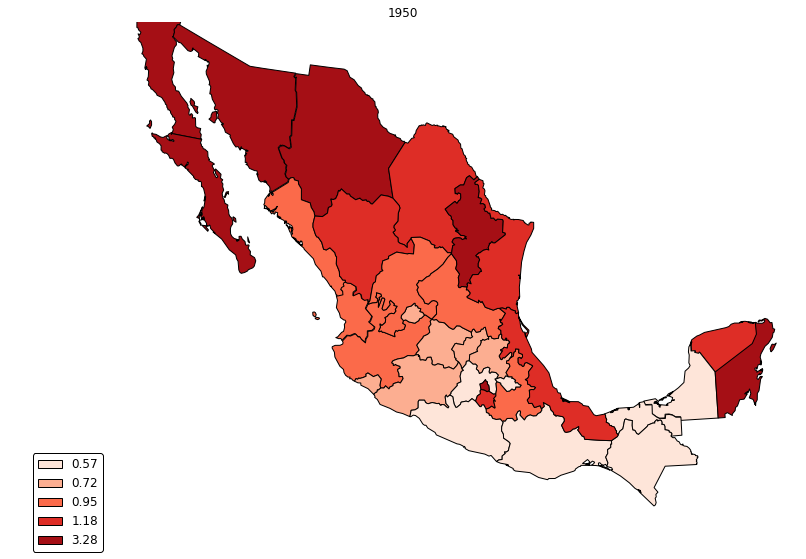

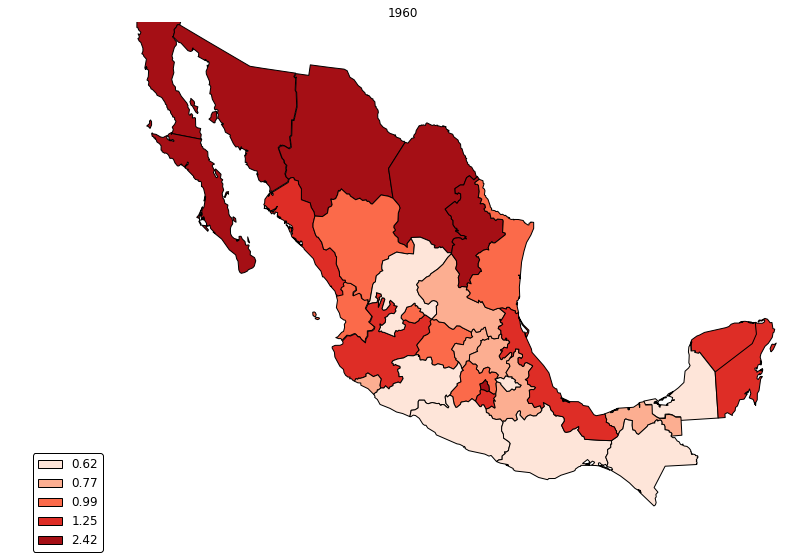

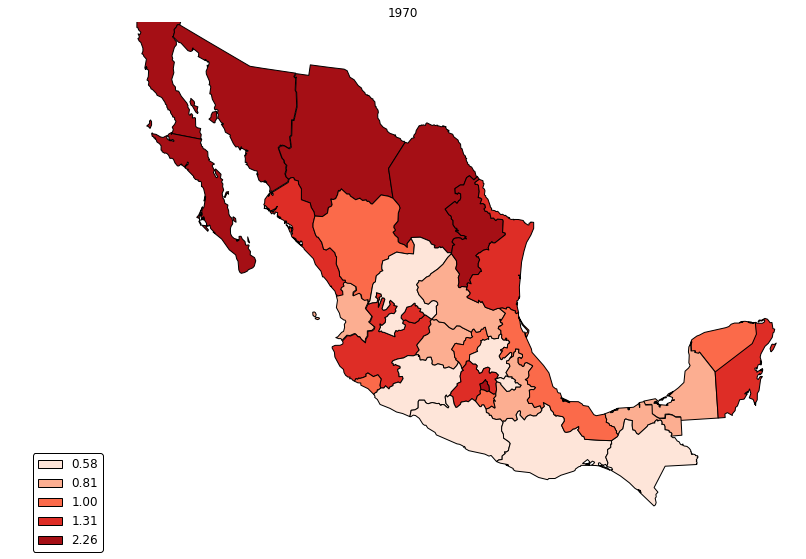

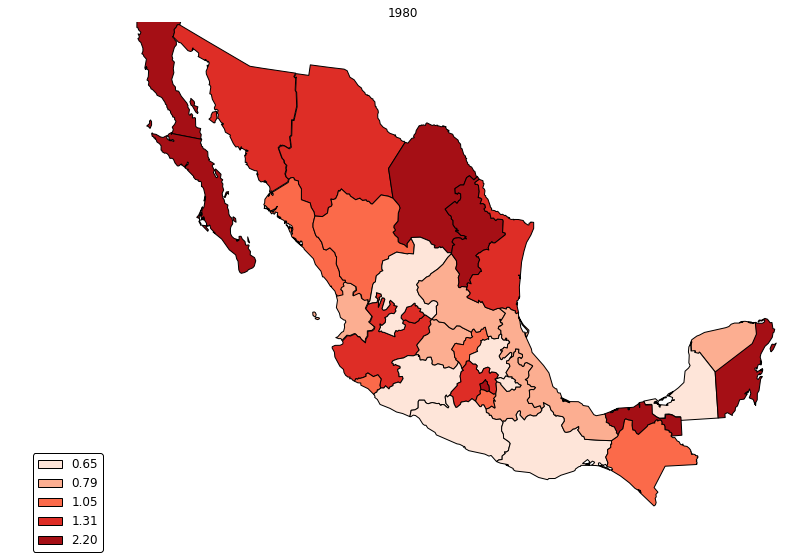

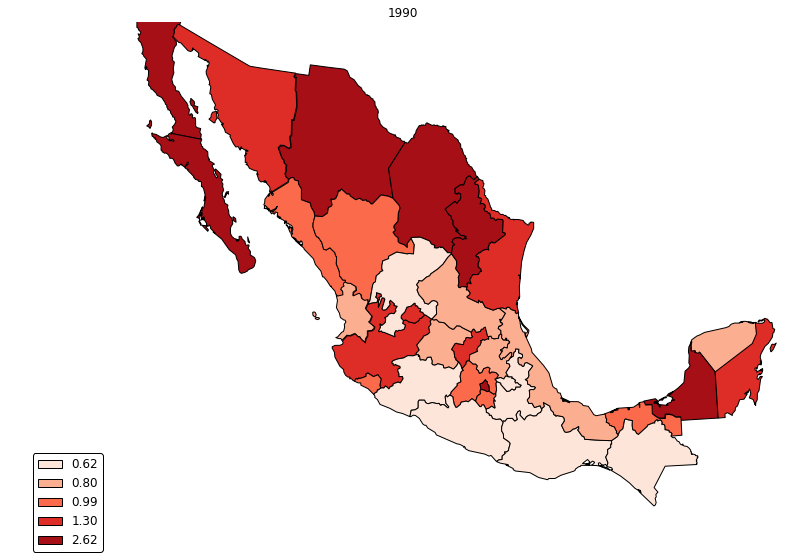

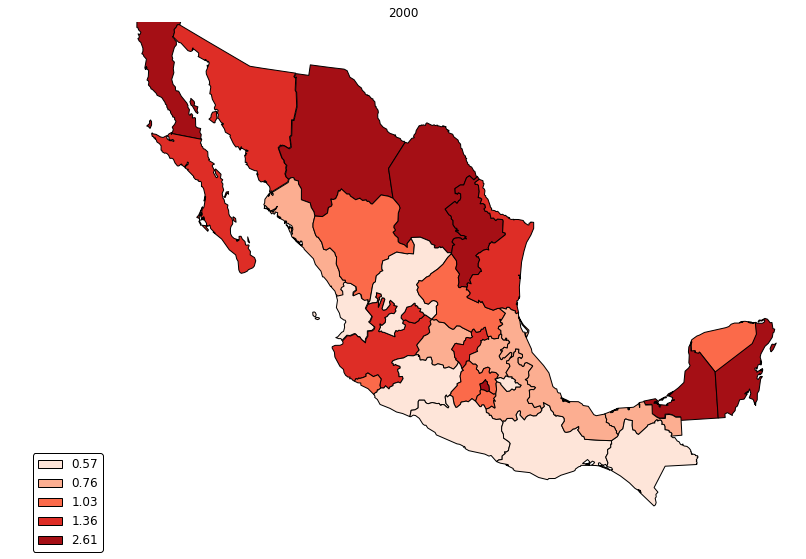

In [13]:

for i,decade in enumerate(r_5):
    legend =[ "%3.2f"%ub for ub in decade.bins ]
    classes = decade.yb
    fn = "r%d.png"%(1940+i*10)
    choropleth(classes,facecolors,reader,  legend,title = "%4d"%(1940+i*10), fileName=fn, dpi=300)

In [14]:
decade.bins

array([ 0.57080511,  0.75528647,  1.03098276,  1.35765013,  2.60506583])

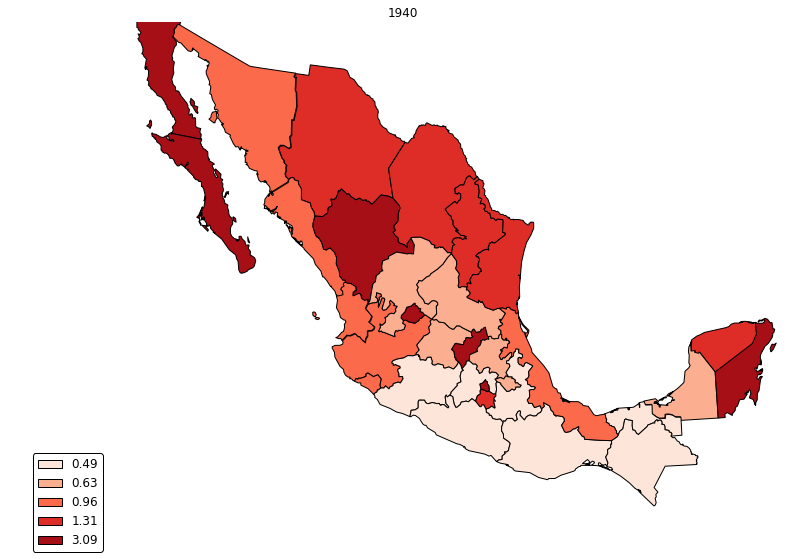

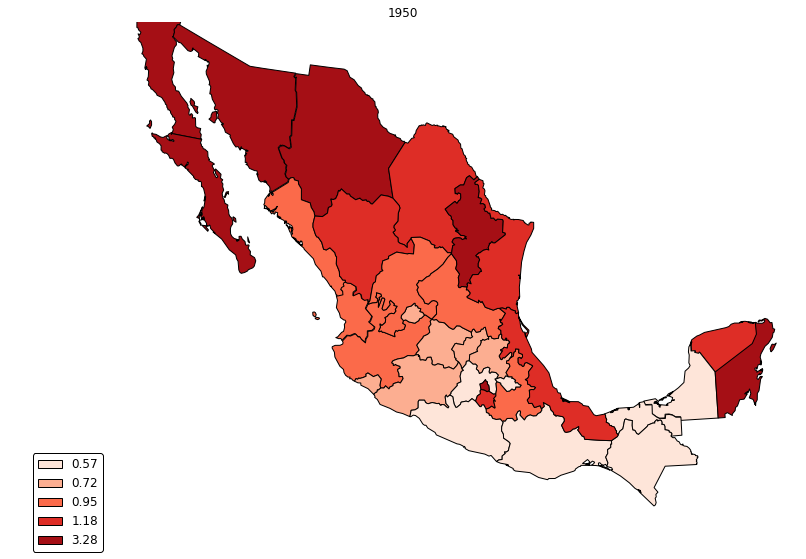

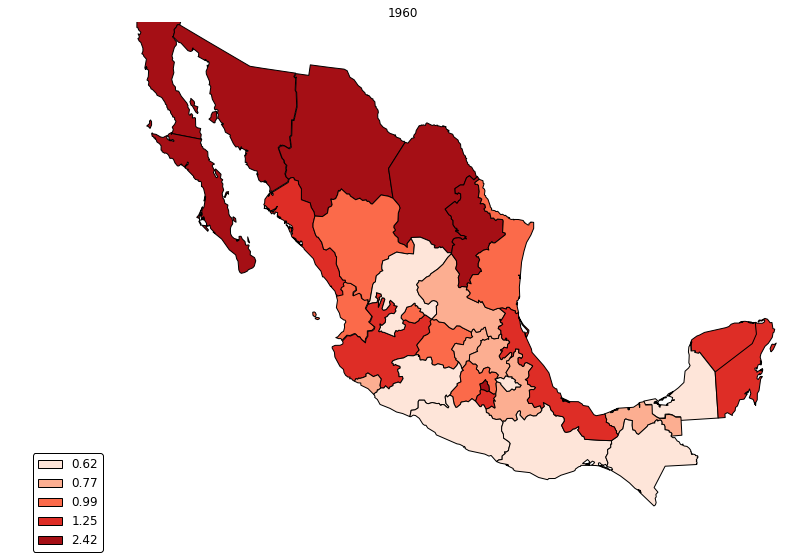

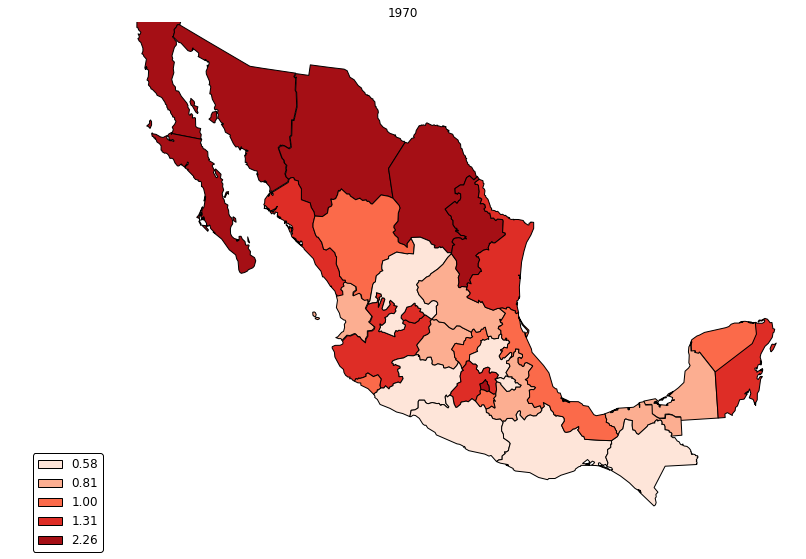

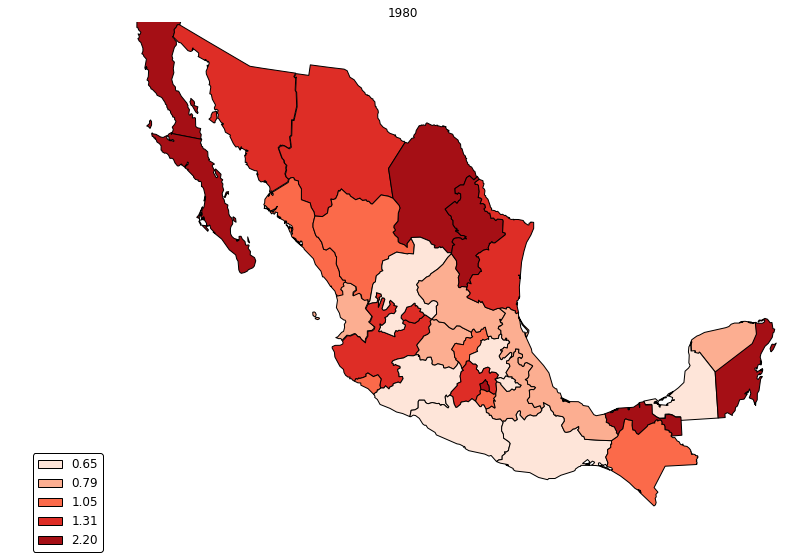

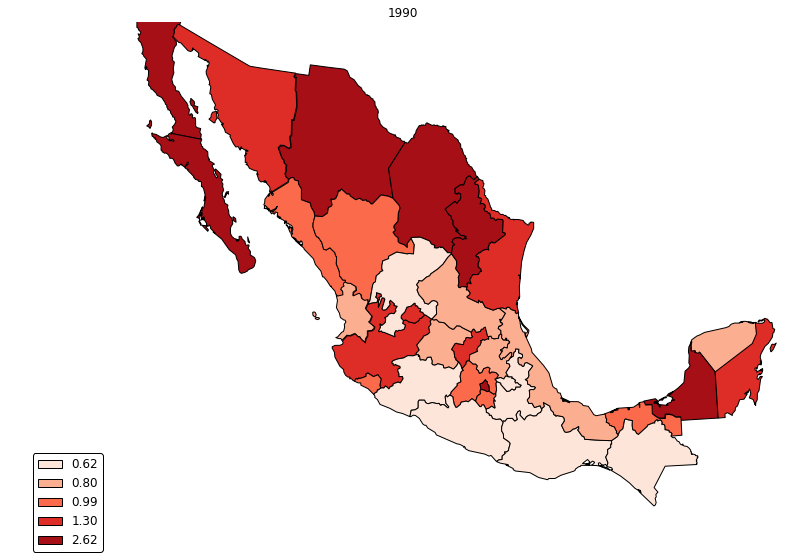

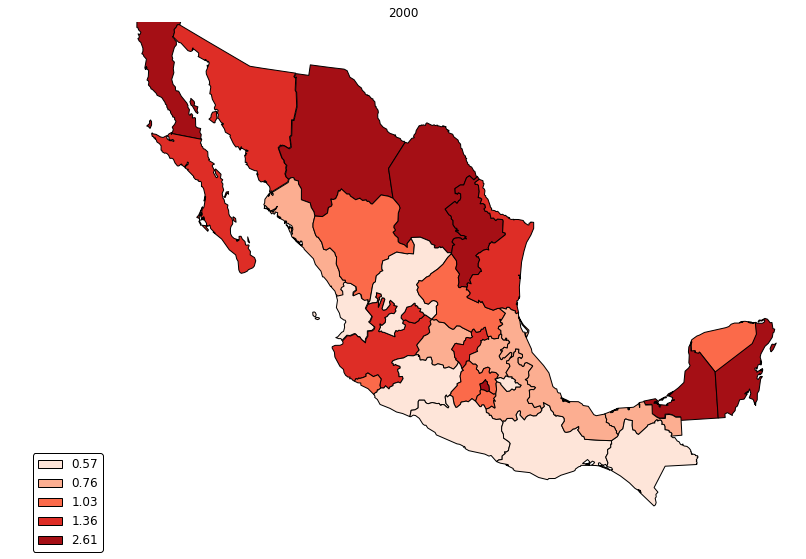

In [15]:

for i,decade in enumerate(r_5):
    legend =[ "%3.2f"%ub for ub in decade.bins ]
    classes = decade.yb
    fn = "r%d.png"%(1940+i*10)
    choropleth(classes,facecolors,reader,  legend,title = "%4d"%(1940+i*10), fileName=fn, dpi=300)

In [16]:
decade.yb

array([4, 3, 0, 3, 3, 1, 3, 1, 0, 2, 4, 2, 2, 2, 4, 1, 4, 0, 0, 0, 1, 0, 3,
       4, 4, 1, 2, 0, 2, 4, 3, 1])

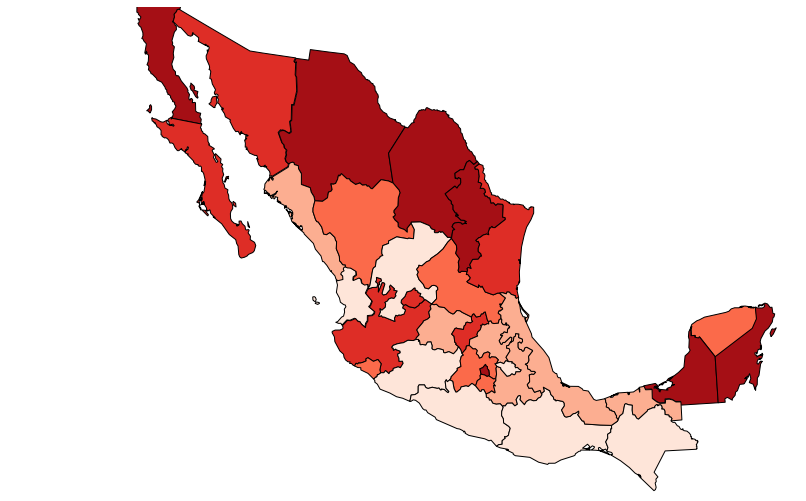

In [17]:
choropleth(classes,facecolors,reader) # no legend

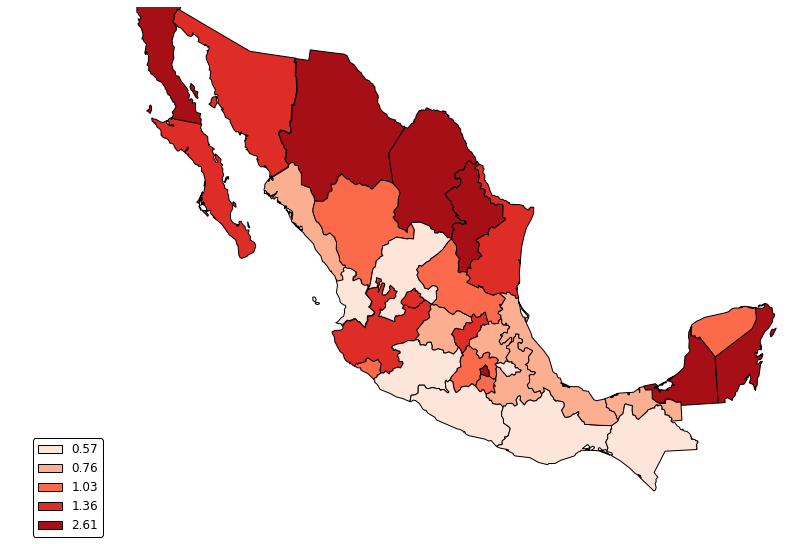

In [18]:
choropleth(classes,facecolors,reader, legend,fileName='test.png')

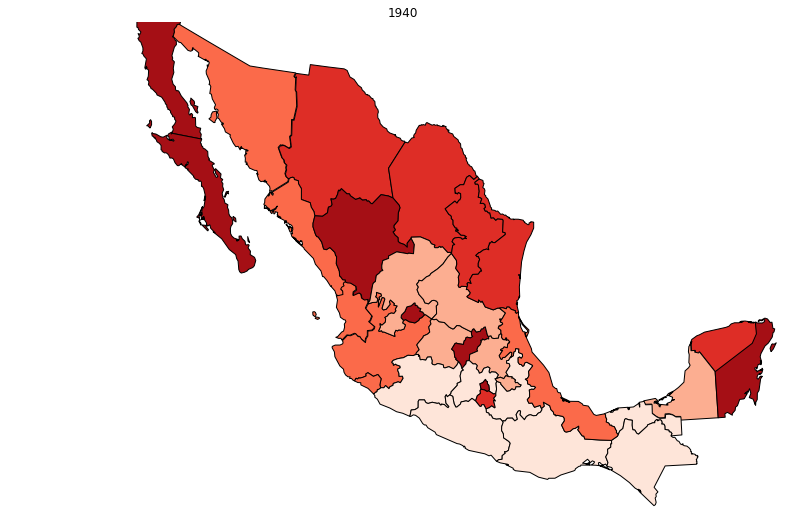

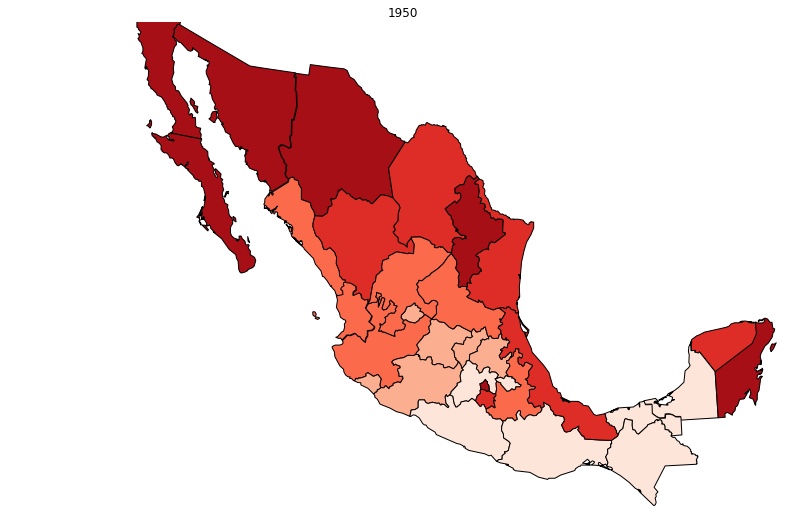

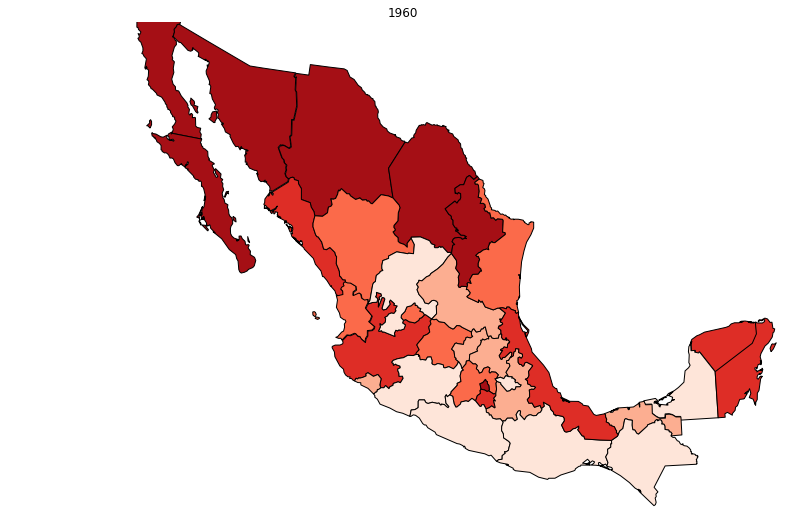

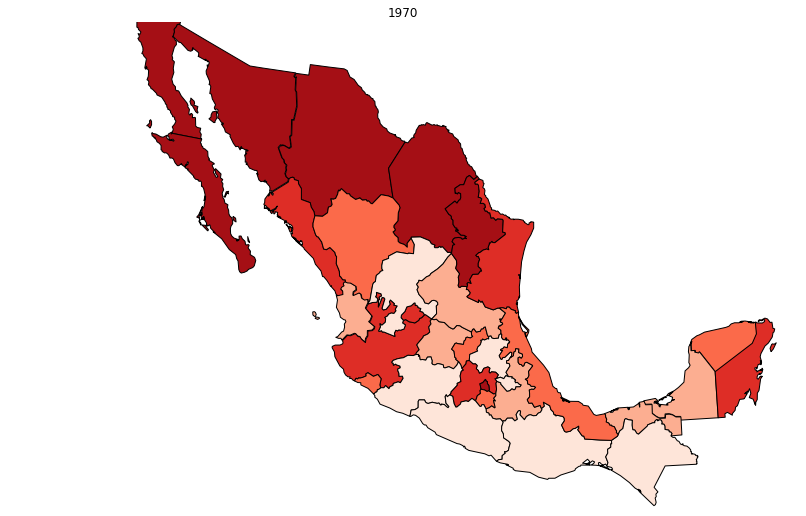

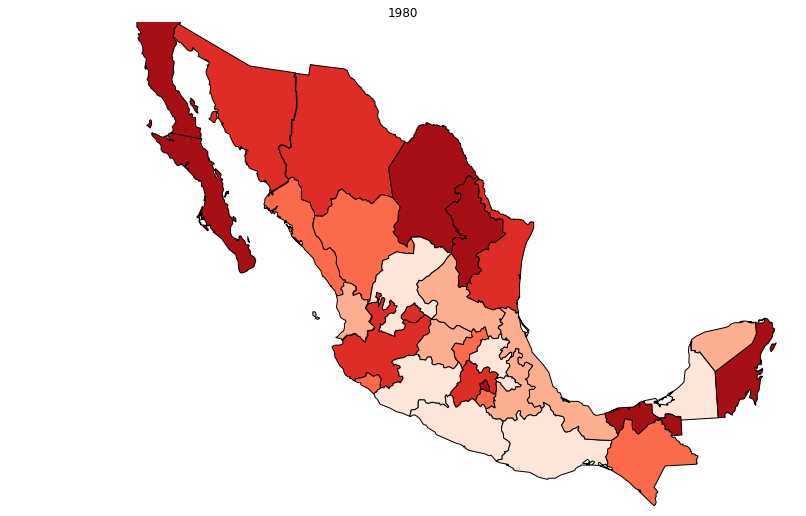

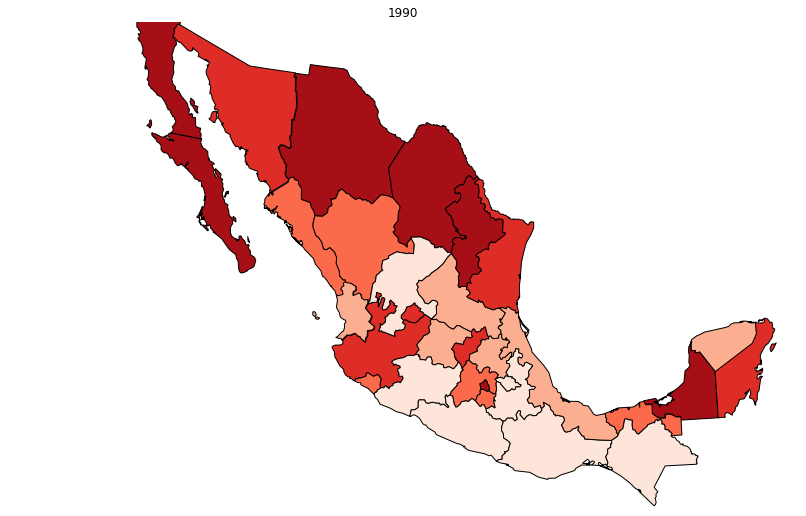

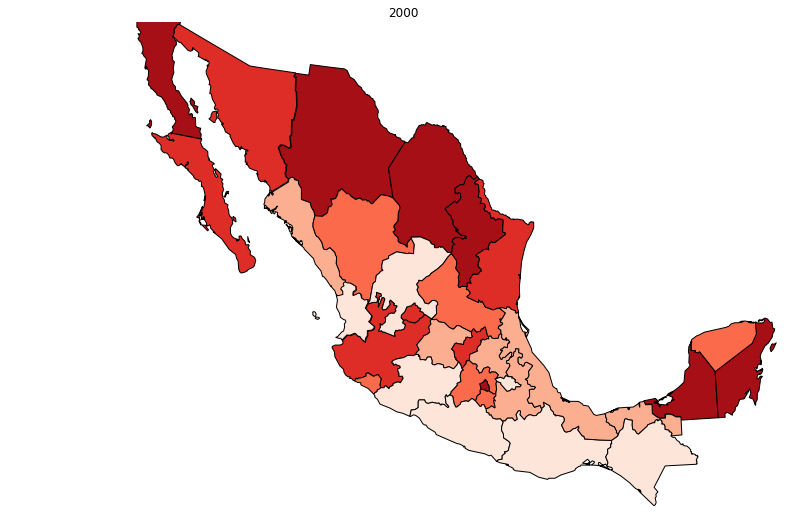

In [19]:

for i,decade in enumerate(r_5):
    legend =[ "%3.2f"%ub for ub in decade.bins ]
    classes = decade.yb
    fn = "r%d.png"%(1940+i*10)
    choropleth(classes,facecolors,reader, title = "%4d"%(1940+i*10), fileName=fn, dpi=300)